In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src import ffnn

%reload_ext autoreload

In [2]:
name_file = './data.txt'
columns = ['x1', 'x2', 'y']

train = pd.read_csv(name_file,
                          names=columns,
                          sep=' ')

# separe the data in two groups train and test not random
train = train.sample(frac=1).reset_index(drop=True)
train = train[:int(len(train)*0.8)]
test = train[int(len(train)*0.8):]

In [3]:
# transform train['x1'] and train['x2'] in a matrix
X = train[['x1','x2']].to_numpy()
X_test = test[['x1','x2']].to_numpy()

In [4]:
Y = np.zeros((train['y'].shape[0], 3))

Error: 68.617490262265
Error: 39.687698999329655
Error: 36.90581407901149
Error: 36.68878216069039
Error: 36.63145336130654
Error: 36.59072448525076
Error: 36.55021202720256
Error: 36.50621004861274
Error: 36.456486356389796
Error: 36.39862672088882
Iteration: 1000
[[0.81362606 0.01433969 0.07663462 0.88344977]
 [0.3136472  0.38398283 0.66617827 0.95483442]
 [0.23150341 0.18777536 0.61967443 0.26990567]]
[[ 0.11578926 -0.32107884 -0.67610646]
 [-0.35599795 -0.35546313 -0.39619001]
 [-0.32562447  0.23178959  0.24989869]
 [ 0.20216811 -0.59014155  0.29333239]
 [ 0.0676138  -0.08825737 -0.28942099]]
Error: 36.32957698116033
Error: 36.2453064002724
Error: 36.14041416378126
Error: 36.00765202028971
Error: 35.83741133194828
Error: 35.61735167488676
Error: 35.332578889425776
Error: 34.967059528140084
Error: 34.5069624577404
Error: 33.94572805983235
Iteration: 2000
[[ 0.80275871 -0.22422733  0.1130413   0.90987506]
 [ 0.29939112  0.63027707  0.75081441  0.98467364]
 [ 0.23251816 -0.49343884  0

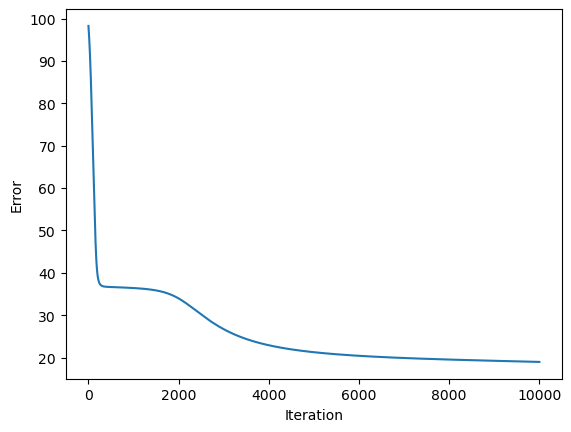

In [11]:
v, w = ffnn.ffnn(X, 4, train['y'], 3, 10000, True, False)

In [12]:
print(v, w)

[[ 0.23718647 -1.1747623   0.28549494  1.00451761]
 [ 0.22672365  2.23973858  1.03223327  1.11199863]
 [ 0.27103266 -3.01996506  1.04095079  0.57954363]] [[ 0.74432298 -0.46409461 -1.23094772]
 [-1.0234849   0.47759894 -0.72270419]
 [-2.99200973 -1.95229101  4.98983243]
 [ 0.39988512 -0.47163371 -0.14127369]
 [ 0.32343353 -0.03534809 -0.69616759]]


In [13]:
G = ffnn.resolveForwardPropagation(X_test, v, w)

(12, 2)
(12, 3)
(12, 3)
(3, 4)


In [14]:
print(X_test.shape)
print(X_test)
print(G.shape)
print(G)

(12, 2)
[[4.7126 0.864 ]
 [0.7661 2.5899]
 [3.9601 1.4057]
 [2.0909 1.6177]
 [0.8122 2.9992]
 [3.6365 2.1778]
 [3.1855 4.2888]
 [2.3099 2.9584]
 [2.5403 2.8867]
 [3.3698 3.9101]
 [4.6737 1.8184]
 [3.9732 1.2429]]
(12, 3)
[[0.08587779 0.07400702 0.91066461]
 [0.66270549 0.35407846 0.07028657]
 [0.09335934 0.07797193 0.89817122]
 [0.5191693  0.27017553 0.167975  ]
 [0.65934105 0.35571208 0.06866664]
 [0.23525082 0.14995156 0.57586646]
 [0.63425199 0.3667495  0.0624721 ]
 [0.64502372 0.35698342 0.06746336]
 [0.63882181 0.35403491 0.06962134]
 [0.63328301 0.36454867 0.06373694]
 [0.08813648 0.07791536 0.89968904]
 [0.09079703 0.07607727 0.90403724]]


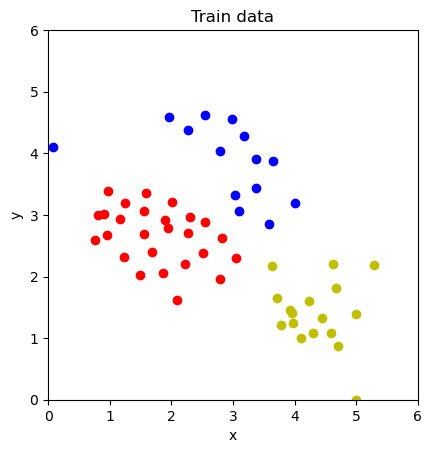

In [15]:
fig, axs = plt.subplots(1)


def applyPlotStyle(ax, title):
    ax.set(xlabel='x', ylabel='y', title=title)
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')


applyPlotStyle(axs, 'Train data')

# Plot imported data
x1 = np.asarray(train[train['y'] == 0]['x1'])
y1 = np.asarray(train[train['y'] == 0]['x2'])

x2 = np.asarray(train[train['y'] == 1]['x1'])
y2 = np.asarray(train[train['y'] == 1]['x2'])

x3 = np.asarray(train[train['y'] == 2]['x1'])
y3 = np.asarray(train[train['y'] == 2]['x2'])

axs.plot(x1, y1, 'ro')
axs.plot(x2, y2, 'bo')
axs.plot(x3, y3, 'yo')

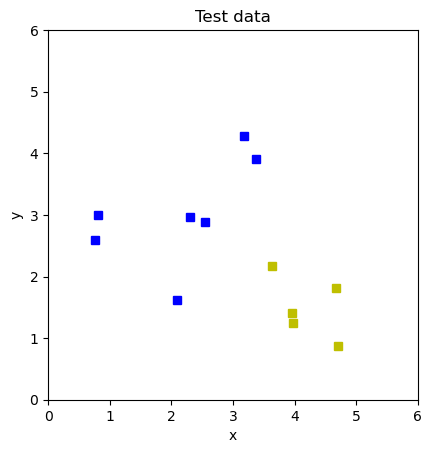

In [17]:
fig, axs = plt.subplots(1)


def applyPlotStyle(ax, title):
    ax.set(xlabel='x', ylabel='y', title=title)
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')


applyPlotStyle(axs, 'Test data')

# Same with test
for i in range(G.shape[0]):
    if G[i, 0] > G[i, 1] and G[i, 0] > G[i, 2]:
        axs.plot(X_test[i, 0], X_test[i, 1], 'rs')
    elif G[i, 1] > G[i, 0] and G[i, 1] > G[i, 2]:
        axs.plot(X_test[i, 0], X_test[i, 1], 'bs')
    elif G[i, 2] > G[i, 0] and G[i, 2] > G[i, 1]:
        axs.plot(X_test[i, 0], X_test[i, 1], 'ys')
    else:
        axs.plot(X_test[i, 0], X_test[i, 1], 'ks')
